# Project: 12-2023 Instacart Basket Analysis
## Author: Nadia Ordonez
## Step 9 IC Stakeholders key questions

# Table of Contents
* [1. Introduction](#1.-Introduction)
* [2. Stakeholders key questions](#2.-Stakeholders-key-questions)
* [3. Importing data](#3.-Importing-data)
    * [3.1 Importing libraries](#3.1-Importing-libraries)
    * [3.2 Importing data](#3.2-Importing-data)
* [4. Schedule ads](#4.-Schedule-ads)
* [5. Timing expenditure habits](#5.-Timing-expenditure-habits)
* [6. Price tags](#6.-Price-tags)
* [7. Frequency of product orders per department](#7.-Frequency-of-product-orders-per-department)
* [8. Customers and ordering behaviors](#8.-Customer-and-ordering-behaviors)
    * [8.1 Brand loyalty distribution](#8.1-Brand-loyalty-distribution)
    * [8.2 Ordering habits and loyalty](#8.2-Ordering-habits-and-loyalty)
    * [8.3 Ordering habits and regions](#8.3-Ordering-habits-and-regions)
    * [8.4 Age and family status](#8.4-Age-and-family-status)
    * [8.5 Demographic insights](#8.5-Demographic-insights)
* [9. Recommnedations](#9.-Recommendations)

# 1. Introduction

The Instacart stakeholders are most interested in the variety of customers in their database along with their purchasing behaviors. They assume they can't target everyone using the same methods, and they’re considering a targeted marketing strategy. They want to target different customers with applicable marketing campaigns to see whether they have an effect on the sale of their products. This analysis will inform what this strategy might look like to ensure Instacart targets the right customer profiles with the appropriate products. 

NOTE: After deliverations with stakeholders, it was also agreed to run the below data analysis taking into account the volumen of orders per user, instead of single orders per user. In our current dataframe, a single order_id is repeated several times in the "order_id" variable depending on how many products were purchased within single orders.

NOTE: Due to RAM memory issues, during the 3.1 Importing data step, the df was reduced in size by selecting relevant variables. These commands were silenced after being run once. 

# 2. Stakeholders key questions

The stakeholders would like to be able to answer the following key questions:

The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

The sales team also wants to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ. For example:

a. What’s the distribution among users in regards to their brand loyalty?

b. Are there differences in ordering habits based on a customer’s loyalty status?

c. Are there differences in ordering habits based on a customer’s region?

d. Is there a connection between age and family status in terms of ordering habits?

e. What different classifications does the demographic information suggest? Is there a relation betwen age and spending power (income)?

# 3. Importing data

## 3.1 Importing libraries

In [1]:
#Import analytical libraries
import pandas as pd
import numpy as np
import os

In [2]:
#Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 3.2 Importing data

In [3]:
#Project folder path into a string to easily retrieve data
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'

### Reducing df size

NOTE: Due to RAM memory issues, during the 3.1 Importing data step, the df was reduced in size by selecting relevant variables. These commands were silenced after being run once. 

In [4]:
#Import “orders_products_der_step6.pkl”
#This df is the result of merging customer, products and orders details after applying an exclusion flag
#In this df, aggregation and derivations are included, to see details see "Step 6 IC Derivations and Aggregations"

#stakeholders = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'orders_products_der_step6.pkl'))

In [5]:
#Check df size

#stakeholders.shape

(30992966, 30)

In [6]:
#Check headers

#stakeholders.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_sequence,reordered,product_name,...,max_order_number,price_range_products,busiest_days,busiest_period_of_day,region,loyalty_flag,mean_price_per_user,type_of_spender,median_days_since_prior_order,usage_frequency
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,10,mid-range,Regular days,Average orders,South,New,6.367797,Low spender,20.5,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,10,mid-range,Least busiest days,Average orders,South,New,6.367797,Low spender,20.5,Non-frequent customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,10,mid-range,Least busiest days,Average orders,South,New,6.367797,Low spender,20.5,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,10,mid-range,Least busiest days,Average orders,South,New,6.367797,Low spender,20.5,Non-frequent customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,10,mid-range,Least busiest days,Most orders,South,New,6.367797,Low spender,20.5,Non-frequent customer


In [7]:
#See headers

#stakeholders.dtypes

order_id                            int32
user_id                             int32
order_number                         int8
orders_day_of_week                   int8
order_hour_of_day                    int8
days_since_prior_order            float64
product_id                          int32
add_to_cart_sequence                int32
reordered                            int8
product_name                       object
aisle_id                             int8
department_id                        int8
prices                            float64
gender                           category
state                            category
age                                 int32
date_joined                        object
number_of_dependants                int32
family_status                    category
income                              int64
max_order_number                     int8
price_range_products               object
busiest_days                       object
busiest_period_of_day             

In [9]:
#Create a subset to avoid RAM issues
#Selecting columns to avoid RAM memory issues

#variables = ['order_id', 'user_id', 'order_number', 'orders_day_of_week', 'order_hour_of_day',  'days_since_prior_order', 'product_id', 'product_name',  'department_id', 'prices', 'age', 'number_of_dependants', 'family_status', 'income', 'price_range_products', 'region', 'loyalty_flag', 'type_of_spender', 'usage_frequency']
#stakeholders = stakeholders.loc[:, variables]

In [10]:
#Check df size

#stakeholders.shape

(30992966, 19)

In [11]:
#Check headers

#stakeholders.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,age,number_of_dependants,family_status,income,price_range_products,region,loyalty_flag,type_of_spender,usage_frequency
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer


In [12]:
#Exporting and Importing
#Exporting a smaller df with relevant variables 

#stakeholders.to_pickle(os.path.join(path, '02 Data','Prepared data', 'stakeholders.pkl'))

### Stakeholders df

In [4]:
#Importing smaller df in a second script run to avoid RAM memory issues
stakeholders = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared data', 'stakeholders.pkl'))

In [5]:
#Check df size
stakeholders.shape

(30992966, 19)

In [6]:
#See headers
stakeholders.dtypes

order_id                     int32
user_id                      int32
order_number                  int8
orders_day_of_week            int8
order_hour_of_day             int8
days_since_prior_order     float64
product_id                   int32
product_name                object
department_id                 int8
prices                     float64
age                          int32
number_of_dependants         int32
family_status             category
income                       int64
price_range_products        object
region                      object
loyalty_flag                object
type_of_spender             object
usage_frequency             object
dtype: object

# 4. Schedule ads

The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

## Busiest days of the week

In [7]:
#Printing the frequency of a column will quickly inform you which values appear more often within that column
stakeholders['orders_day_of_week'].value_counts(dropna = False)
#the value 0 means Saturday
#0 and 1 are the "Busiest days"
#Frequency of days equals to frequency of orders based on order volumen in our df

orders_day_of_week
0    5913859
1    5417064
6    4294962
5    4037350
2    4028494
3    3672954
4    3628283
Name: count, dtype: int64

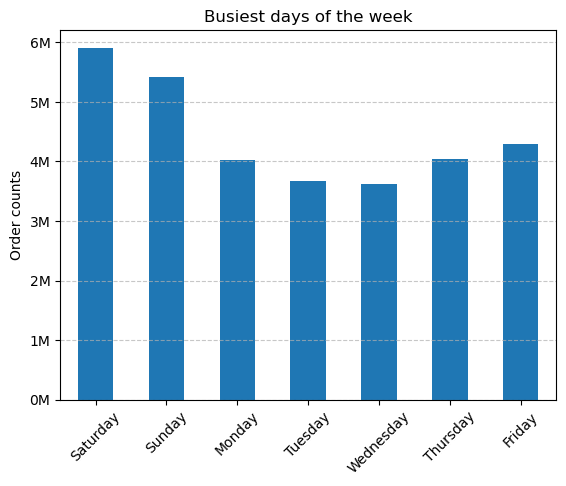

In [8]:
#Converting variable to categorical for better labeling
stakeholders['orders_day_of_week'] = stakeholders['orders_day_of_week'].astype('category')

#Defining the desired names for each day of the week
day_names = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

#Plotting frequency of a variable
ax = stakeholders['orders_day_of_week'].value_counts().sort_index().plot.bar()

plt.title("Busiest days of the week")
plt.ylabel("Order counts") #not as single orders, but as order volumen

#Remove main x-axis label
ax.set_xlabel("")

#Customize x-axis labels
ax.set_xticklabels(day_names, rotation=45)

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6))))

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'busiest day of the week.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

Fewer orders are placed during Wednesday and Tuesday.

## Busiest hours of the day

In [9]:
#Printing the frequency of a column will quickly inform you which values appear more often within that column
stakeholders['order_hour_of_day'].value_counts(dropna = False)
#Frequency of hours equals to frequency of orders based on order volumen

order_hour_of_day
10    2652317
11    2617229
14    2570213
13    2541527
15    2538253
12    2497997
16    2415839
9     2366037
17    1984069
8     1660891
18    1552540
19    1194918
20     931746
7      864069
21     763813
22     607550
23     384838
6      281307
0      208214
1      109705
5       84514
2       65743
4       50802
3       48835
Name: count, dtype: int64

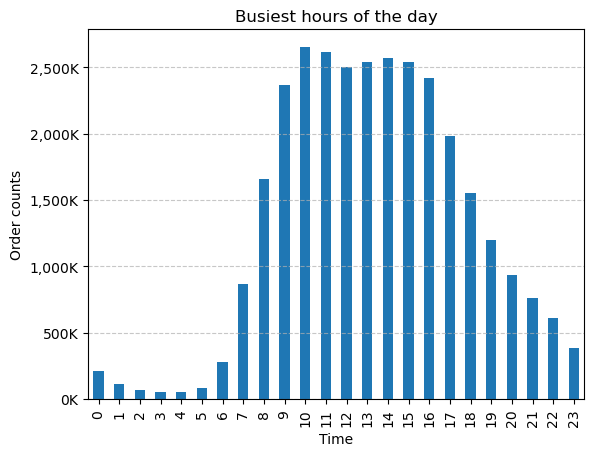

In [10]:
#Plotting frequency of a variable
ax = stakeholders['order_hour_of_day'].value_counts().sort_index().plot.bar()

plt.title("Busiest hours of the day")
plt.xlabel("Time")
plt.ylabel("Order counts") #not as single orders, but as order volumen

#Changing y-axis to display values in thousands
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1e3)))) 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'busiest hours of the day.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

The fewest number of order (under 500k) are placed between 23:00 and 06:00 hours.

# 5. Timing expenditure habits

The sales team wants to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

## Sampling data

In [11]:
#In order to create a subset that actually represents the entirety of your data, selected rows would beed to be randomized
#In a 70/30 split, for example, the 30 % sample would statistically resemble the 70 % sample but contain less rows
#30% df is used for plotting and 70% for data analyses
np.random.seed(4)
dev = np.random.rand(len(stakeholders)) <= 0.7
#seed 4 = Python will always give you the same set of random numbers
#random is a function that creates random numbers 
#rand is a function that ensures the random numbers generated by random follow the uniform distribution. 
#Uniform distribution simply means that there should be an equal chance for every number between 0 and 1 to occur
#Now there is a list of 32,434,212 boolean values

In [12]:
#Splitting df into two subsets
#store 70 percent of df in the big sample 
big = stakeholders[dev]

In [13]:
#Storing 30 percent of df in the small sample
small = stakeholders[~dev]

In [14]:
#Double check sampling data actions
#length of entire df
len(stakeholders)

30992966

In [15]:
#length of entire df must be equal to big and small df
len(big) + len (small)
#both lengths matched

30992966

## Product price per hour

In [16]:
#reduce RAM usage by selecting only the columns of interest to plot for a line chart
df = small[['order_hour_of_day','prices']]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

Text(0, 0.5, 'Price')

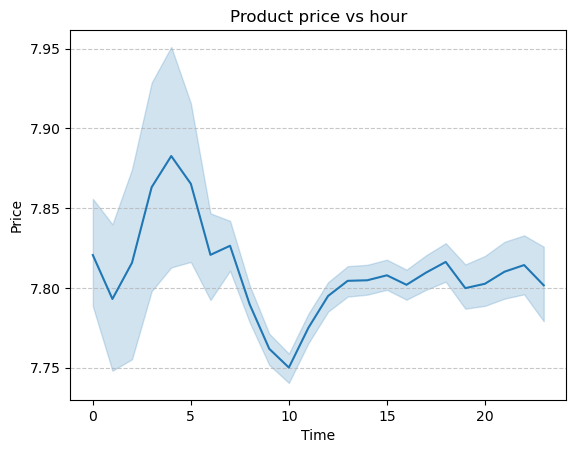

In [17]:
#Creating the line chart
line = sns.lineplot(data = df, x = 'order_hour_of_day',y = 'prices')
#Translucent blue bands around the line are error bands that represent the chart’s confidence intervals 
#If this line were a prediction, there would be a 95 percent probability that 
#the predicted value would fall within the area of the error bands.

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.title("Product price vs hour")
plt.xlabel("Time")
plt.ylabel("Price")

Between 00:00 and 06.00 prices per product tend to fluctuate from 7.75 up to 7.95 dollars. 

## Total sales per hour

In [18]:
#Group by hours, then calculate the sum of prices
grouped_hours = stakeholders.groupby('order_hour_of_day')['prices'].sum().reset_index()
grouped_hours

,order_hour_of_day,prices
0,0,1627169.4
1,1,856736.6
2,2,513173.9
3,3,382472.9
4,4,398511.7
5,5,662230.7
6,6,2200893.0
7,7,6761827.3
8,8,12945550.2
9,9,18351348.9


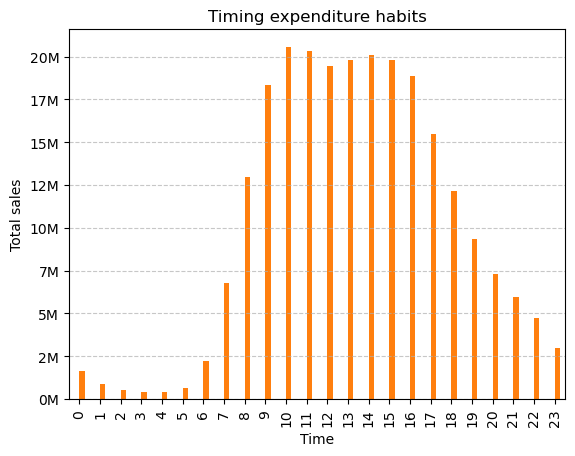

In [19]:
#Plotting frequency of a variable
ax = stakeholders.groupby('order_hour_of_day')['prices'].sum().reset_index().plot.bar(legend=None)

plt.title("Timing expenditure habits")
plt.xlabel("Time")
plt.ylabel("Total sales")

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'timing expenditure habits.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

Between 09:00 and 16:00 hours, our users spent hourly more than 17M dollars. Strikingly, at 10:00, 11h00 and 14:00 more than 20M in sales are registered. 

# 6. Price tags

* Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts. In Step 6 IC Derivations and Aggregation, price tags were created under the variable "price_range_products", following the below criteria. 
    * If the item’s price is lower than or equal to 5 dollars, it will be labeled a “low-range”.
    * If the item’s price is above 5 dollars but lower than or equal to 15 dollars, it will be labeled a “mid-range”.
    * If the item’s price is above 15 dollars, it will be labeled a “high-range”.
* NOTE: the total counts does not reflect the total product count that exists on our inventory, but rather the frequency at which our diferent product types are ordered.  

In [20]:
#Printing the frequency of a column will quickly inform you which values appear more often within that column
stakeholders['price_range_products'].value_counts(dropna = False)
#Frequency of hours equals to frequency of orders based on order volumen

price_range_products
mid-range     20920614
low-range      9674395
high-range      393080
NaN               4877
Name: count, dtype: int64

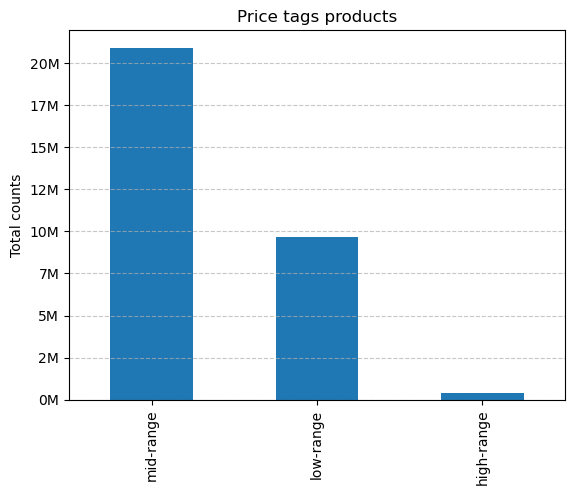

In [21]:
#Plotting frequency of a variable
ax = stakeholders['price_range_products'].value_counts(dropna = True).plot.bar(legend=None)

plt.title("Price tags products")
plt.ylabel("Total counts")

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Remove main x-axis label
ax.set_xlabel("")

#Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'price tags products.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

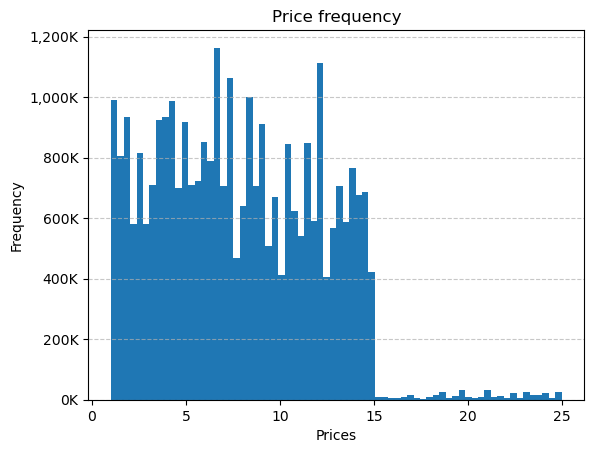

In [22]:
#Plotting frequency of a continuos variable
#Frequency of prices
ax = stakeholders['prices'].plot.hist(bins = 70)

plt.title("Price frequency")
plt.xlabel("Prices")
plt.ylabel("Frequency")

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Changing y-axis to display values in thousands
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1e3)))) 

#Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'price frequency.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

Mid-range products are the most popular among our users. These are products that cost between 5 and 15 dollars. Products that cost more than 15 dollars are not purchased very frequently.  

# 7. Frequency of product orders per department

Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [23]:
#Adding department names
#Creating a variable containing the department names
#Creating a dictionary
#NOTE: Dictionary provided by Instacart team
department_dict = {
    '1': {'department': 'frozen'},
    '2': {'department': 'other'},
    '3': {'department': 'bakery'},
    '4': {'department': 'produce'},
    '5': {'department': 'alcohol'},
    '6': {'department': 'international'},
    '7': {'department': 'beverages'},
    '8': {'department': 'pets'},
    '9': {'department': 'dry goods pasta'},
    '10': {'department': 'bulk'},
    '11': {'department': 'personal care'},
    '12': {'department': 'meat seafood'},
    '13': {'department': 'pantry'},
    '14': {'department': 'breakfast'},
    '15': {'department': 'canned goods'},
    '16': {'department': 'dairy eggs'},
    '17': {'department': 'household'},
    '18': {'department': 'babies'},
    '19': {'department': 'snacks'},
    '20': {'department': 'deli'},
    '21': {'department': 'missing'}
}

In [24]:
#See dictionary
department_dict

{'1': {'department': 'frozen'},
 '2': {'department': 'other'},
 '3': {'department': 'bakery'},
 '4': {'department': 'produce'},
 '5': {'department': 'alcohol'},
 '6': {'department': 'international'},
 '7': {'department': 'beverages'},
 '8': {'department': 'pets'},
 '9': {'department': 'dry goods pasta'},
 '10': {'department': 'bulk'},
 '11': {'department': 'personal care'},
 '12': {'department': 'meat seafood'},
 '13': {'department': 'pantry'},
 '14': {'department': 'breakfast'},
 '15': {'department': 'canned goods'},
 '16': {'department': 'dairy eggs'},
 '17': {'department': 'household'},
 '18': {'department': 'babies'},
 '19': {'department': 'snacks'},
 '20': {'department': 'deli'},
 '21': {'department': 'missing'}}

In [25]:
#Convert 'department_id' to string to match the keys in the dictionary
stakeholders['department_id'] = stakeholders['department_id'].astype(str)

In [26]:
#Map 'department_id' to 'department_name' using the dictionary
stakeholders['department_name'] = stakeholders['department_id'].map(lambda x: department_dict.get(x, {}).get('department', 'unknown'))

In [27]:
#See results
stakeholders.head()
#"department_name" was added

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,product_name,department_id,prices,age,number_of_dependants,family_status,income,price_range_products,region,loyalty_flag,type_of_spender,usage_frequency,department_name
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer,beverages
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer,beverages
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer,beverages
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer,beverages
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,31,3,married,40423,mid-range,South,New,Low spender,Non-frequent customer,beverages


In [28]:
#Counting values within new column
stakeholders['department_name'].value_counts(dropna = False)
#The top 3 grocery departments with the highest frequency of orders are produce, dairy eggs, and snacks 

department_name
produce            9079276
dairy eggs         5191364
snacks             2766406
beverages          2573822
frozen             2123342
pantry             1782903
bakery             1125026
canned goods       1012074
deli               1003834
dry goods pasta     822136
household           699858
breakfast           677073
meat seafood        674785
personal care       424362
babies              410392
international       255991
alcohol             144627
pets                 93065
missing              64768
other                34411
bulk                 33451
Name: count, dtype: int64

In [29]:
#Check flags
stakeholders.groupby('department_name').agg({'department_id' : ['min', 'max']})
#nothing odd on the results
#department_name was correctly assigned to the df

department_id    
                          min max
department_name                  
alcohol                     5   5
babies                     18  18
bakery                      3   3
beverages                   7   7
breakfast                  14  14
bulk                       10  10
canned goods               15  15
dairy eggs                 16  16
deli                       20  20
dry goods pasta             9   9
frozen                      1   1
household                  17  17
international               6   6
meat seafood               12  12
missing                    21  21
other                       2   2
pantry                     13  13
personal care              11  11
pets                        8   8
produce                     4   4
snacks                     19  19

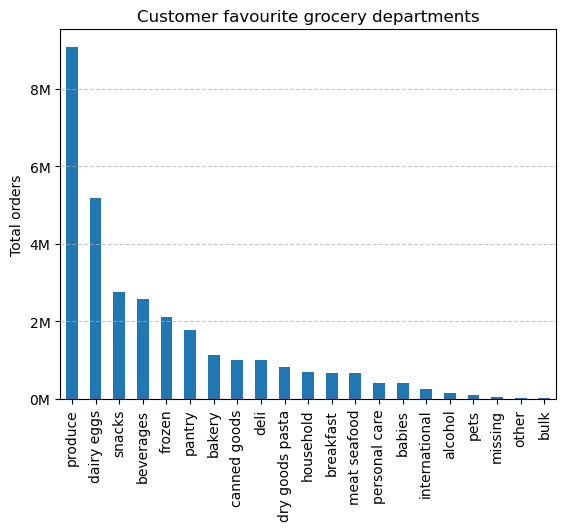

In [30]:
#Plotting frequency of a variable
ax = stakeholders['department_name'].value_counts(dropna = False).plot.bar(legend=None)

plt.title("Customer favourite grocery departments")
plt.ylabel("Total orders") #not single orders but order volumens 

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Remove main x-axis label
ax.set_xlabel("")

#Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'department order frequency.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

More than 8M products were ordered from the produce grocery department, followed by dairy eggs, snacks, beverages and frozen with more than 2M products being order at each department category. 

## 8. Customers and ordering behaviors

The marketing and sales teams are particularly interested in the different types of customers in their system and how their ordering behaviors differ.

## 8.1 Brand loyalty distribution

* Since the business strategy team would like to employ some kind of bonus point program for loyal Instacart customers, a loyalty flag was created in Step 6 IC Derivations and aggregations following the below criteria: 
    * If the maximum orders the user has made is over 40, then the customer will be labeled a “Loyal”.
    * If the maximum orders the user has made is over 10 but less than or equal to 40, then the customer will be labeled “Regular”.
    * If the maximum orders the user has made is less than or equal to 10, then the customer will be labeled “New”.

In [31]:
#Printing the frequency of a column will quickly inform you which values appear more often within that column
stakeholders['loyalty_flag'].value_counts(dropna = False)
#Frequency of loyalty tags equals to frequency of orders based on order volumen

loyalty_flag
Regular    15891172
Loyal      10293959
New         4807835
Name: count, dtype: int64

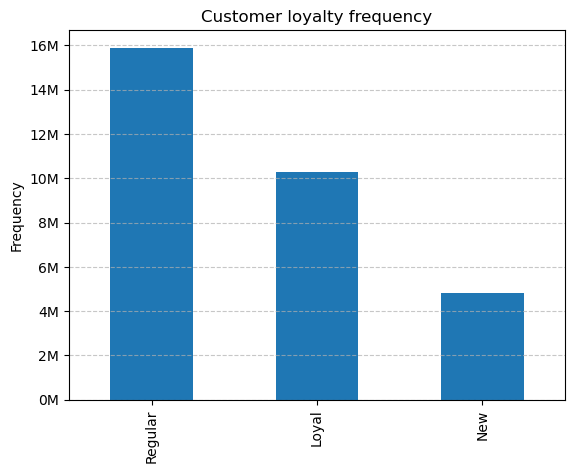

In [32]:
#Plotting frequency of a variable
ax = stakeholders['loyalty_flag'].value_counts(dropna = False).plot.bar(legend=None)
#not unique customers but customers based on order volumen

plt.title("Customer loyalty frequency")
plt.ylabel("Frequency")

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Remove main x-axis label
ax.set_xlabel("")

#Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'loyalty frequency.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

Nearly 16M customers are regular. These regular customers are those who placed a maximum of 10 to 40 orders. 

## 8.2 Ordering habits and loyalty

How often do customers, in terms of their loyalty tags, place orders?

In [33]:
#Average "days_since_prior_order" per customer loyalty
usage_table = pd.pivot_table(stakeholders, values='days_since_prior_order', index='loyalty_flag', aggfunc='mean').reset_index()
usage_table

,loyalty_flag,days_since_prior_order
0,Loyal,6.026906
1,New,17.598809
2,Regular,12.155234


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


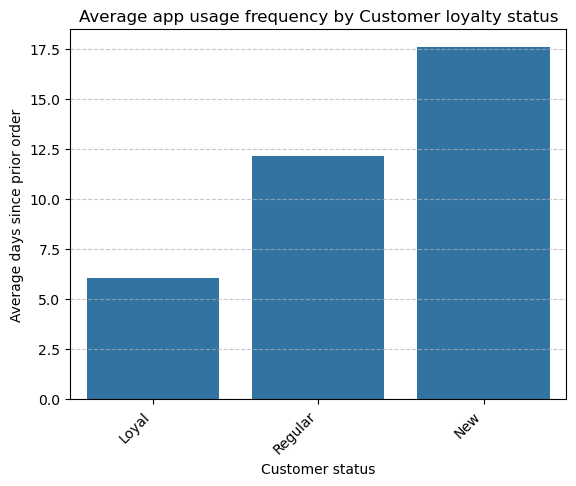

In [34]:
#Determining the order of loyalty categories based on average days since prior order
loyalty_order = usage_table.groupby('loyalty_flag')['days_since_prior_order'].mean().sort_values().index

#Plotting the bar chart with specified order
ax = sns.barplot(x='loyalty_flag', y='days_since_prior_order', data=usage_table, order=loyalty_order, color = '#1f77b4')

plt.title("Average app usage frequency by Customer loyalty status")
plt.xlabel("Customer status")
plt.ylabel("Average days since prior order")

#Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'bar_customer_loyalty_app_usage_frequency.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

# Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

Loyal customers order once a week during our app while regular customers order once every two weeks. 

## 8.3 Ordering habits and regions

In [35]:
#Average "days_since_prior_order" per region
usage_table = pd.pivot_table(stakeholders, values='days_since_prior_order', index='region', aggfunc='mean').reset_index()
usage_table

,region,days_since_prior_order
0,Midwest,10.909287
1,Northeast,10.774406
2,South,10.796315
3,West,10.754394


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


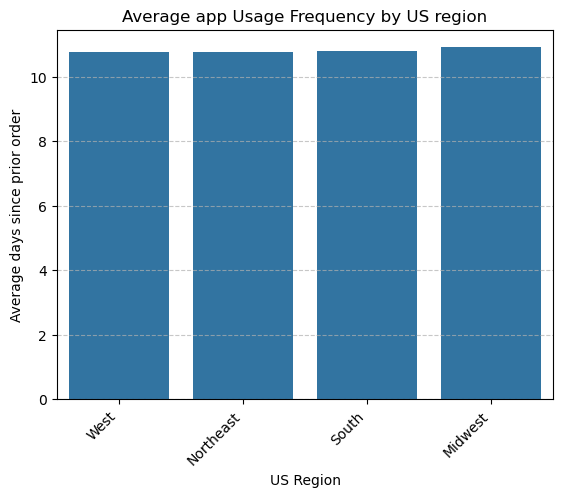

In [36]:
#Determining the order of region categories based on average days since prior order
region_order = usage_table.groupby('region')['days_since_prior_order'].mean().sort_values().index

#Plotting the bar chart with specified order
ax = sns.barplot(x='region', y='days_since_prior_order', data=usage_table, order=region_order, color = '#1f77b4')

plt.title("Average app Usage Frequency by US region")
plt.xlabel("US Region")
plt.ylabel("Average days since prior order")

#Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'bar_region_app_usage_frequency.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

In all US regions, our customers are using our app within a similar frequency, placing orders every 10 to 11 days. 

## 8.4 Age and family status

Is there a connection between age and family status in terms of ordering habits?

### Relation between age and family status

In [37]:
#Reducing RAM usage by selecting only the columns of interest to plot for a line chart
df = small[['age','number_of_dependants']]

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.

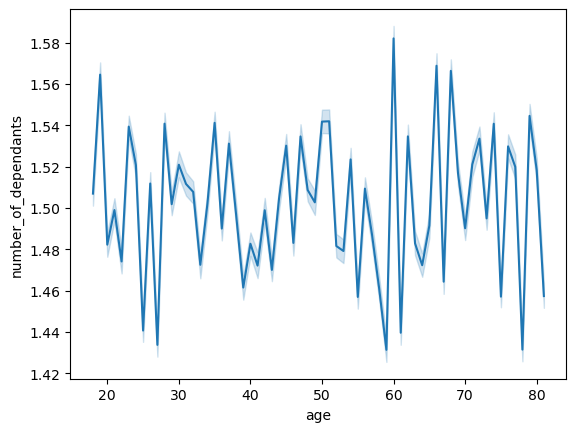

In [39]:
#Creating the line chart
line = sns.lineplot(data = df, x = 'age',y = 'number_of_dependants')

There is not a clear trend between number of dependents and age. Yound and older people have different number of dependents.

### Family status and frequency of orders

In [40]:
#Average "days_since_prior_order" per family status
usage_table = pd.pivot_table(stakeholders, values='days_since_prior_order', index='family_status', aggfunc='mean').reset_index()
usage_table

,family_status,days_since_prior_order
0,divorced/widowed,10.750533
1,living with parents and siblings,10.750641
2,married,10.821002
3,single,10.813100


C:\Users\Ich\AppData\Local\Temp\ipykernel_9512\1365063461.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_order = usage_table.groupby('family_status')['days_since_prior_order'].mean().sort_values().index
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(

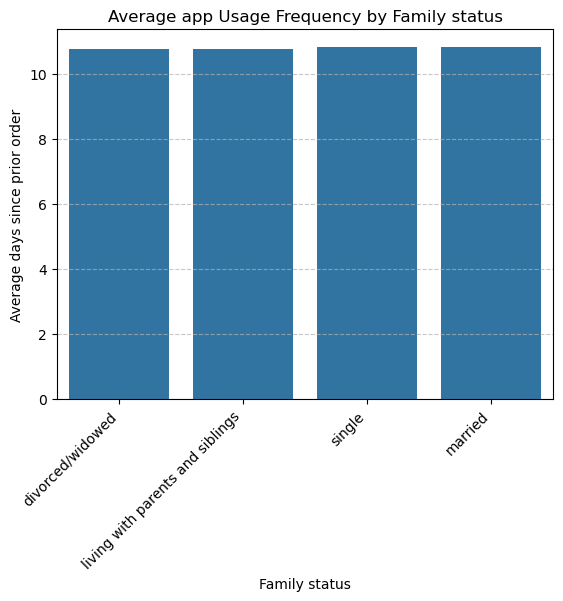

In [41]:
#Determining the order of family status based on average days since prior order
status_order = usage_table.groupby('family_status')['days_since_prior_order'].mean().sort_values().index

#Plotting the bar chart with specified order
ax = sns.barplot(x='family_status', y='days_since_prior_order', data=usage_table, order=status_order, color = '#1f77b4')

plt.title("Average app Usage Frequency by Family status")
plt.xlabel("Family status")
plt.ylabel("Average days since prior order")

#Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Show plot
plt.show()

Regardless of their family status, our customers are using our app within a similar frequency, placing orders every 10 to 11 days. 

### Family status and expenditure

In [45]:
#Total sales per family status
usage_table = pd.pivot_table(stakeholders, values='prices', index='family_status', aggfunc='sum').reset_index()
usage_table

,family_status,prices
0,divorced/widowed,20664935.8
1,living with parents and siblings,11572096.5
2,married,169615014.5
3,single,39710369.2


C:\Users\Ich\AppData\Local\Temp\ipykernel_9512\885731133.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  status_order = usage_table.groupby('family_status')['prices'].sum().sort_values(ascending=False).index
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(gro

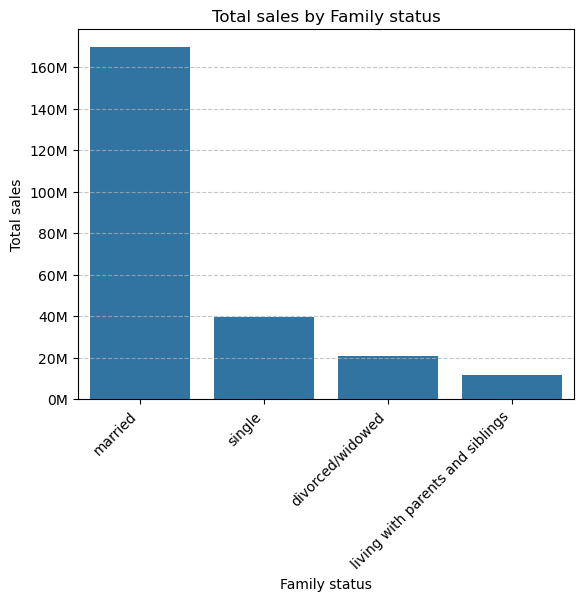

In [58]:
#Determining the order of family status based on total sales
status_order = usage_table.groupby('family_status')['prices'].sum().sort_values(ascending=False).index

#Plotting the bar chart with specified order
ax = sns.barplot(x='family_status', y='prices', data=usage_table, order=status_order, color = '#1f77b4')

plt.title("Total sales by Family status")
plt.xlabel("Family status")
plt.ylabel("Total sales")

#Rotate x-axis labels for better readability
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right') 

#Changing y-axis to display values in millions
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}M".format(int(x/1e6)))) 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'bar_family_status_sales.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

Based on family status, most of the sales are coming from customers who are married. This group generated more than 160M dollars in sales. 

## 8.5 Demographic insights

What different classifications does the demographic information suggest? Is there a relation betwen age and spending power (income)?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


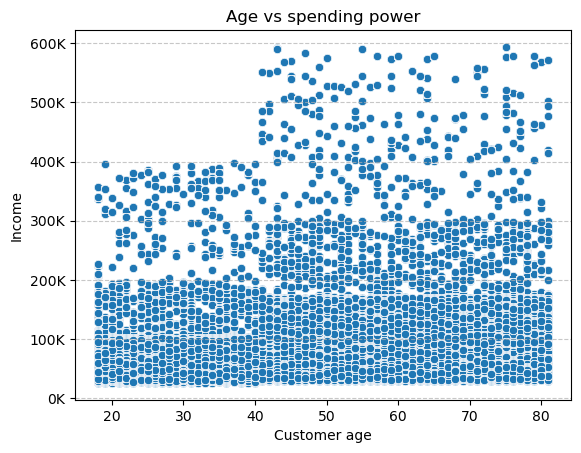

In [60]:
#Plotting age against income
scatt = sns.scatterplot(x = 'age', y = 'income',data = stakeholders)

plt.title("Age vs spending power")
plt.xlabel("Customer age")
plt.ylabel("Income")

#Changing y-axis to display values in thousands
scatt.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}K".format(int(x/1e3)))) 

#Add grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

#Save the plot in the specified directory
path = r'C:\Users\Ich\Documents\12-2023 Instacart Basket Analysis'
filename = 'age_vs_income.png'
filepath = os.path.join(path, '04 Analysis', 'Visualizations', filename)

#Save plot before showing
plt.savefig(filepath, bbox_inches='tight')

#Show plot
plt.show()

Users below the age of 40 typically have a maximum income cap of 400K, with the majority earning less than 200K. As individuals progress into their 40s and approach the golden years, there is a potential for income to peak around 600K, although the majority are likely to earn below 300K during this stage of their careers.

# 9. Recommendations

For a targeted marketing campaign, the following recommendations are suggested.

1.- Optimized Ad Scheduling: To enhance the effectiveness of our targeted marketing campaign, consider scheduling ads during periods with lower order volumes. The analysis indicates that Wednesdays and Thursdays between 23:00 and 06:00 experience the fewest orders on our app. 

2.- Strategic Advertising Timing: Capitalize on peak user activity and spending by focusing product advertising between 09:00 and 16:00. During these hours, our users spend each hour over 17 million dollars. Aligning marketing efforts with this active period can maximize engagement and sales.  

3.- Product Pricing: Simplify the product pricing scheme for the marketing and sales teams. Emphasize mid-range products priced between 5 and 15 dollars, as these have proven to be the most popular among our users.

4.- Targeted Grocery Department Promotion: Acknowledge the popularity of certain grocery departments, such as produce, dairy eggs, snacks, beverages, and frozen items, where over 2 million products are ordered in each category. Consider intensifying promotions in these areas or strategizing to boost the visibility of other departments.

5.- Loyalty Program Implementation: Launch a loyalty program targeting customers who currently contribute to 33.8% of all app sales. On average, these loyal customers place orders once a week, presenting an opportunity to foster continued engagement and loyalty.   

6.- Demographic and Regional Insights: Leverage demographic insights to tailor marketing strategies. Recognize that customers across all US regions and family statuses exhibit similar app usage frequencies, placing orders every 10 to 11 days on average. However, note that married customers, particularly those older than 40, exhibit higher spending power, contributing to sales exceeding 160 million dollars in our current database. Consider refining marketing approaches to capitalize on these trends.